<a href="https://colab.research.google.com/github/NenkonPu/DataScienceProjects-in-Madrid/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn

# Data preparation

In [0]:
from matplotlib import pyplot as plt 
import pandas as pd 

#data information 
data = pd.read_csv('kidney_fail_dataset.csv')
print('\ndata information')
data.info()
print('\ndata description')
data.head()



data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 19 columns):
patient_id                          957 non-null int64
height                              957 non-null float64
weight                              957 non-null float64
kidney absortion test               957 non-null int64
urea                                836 non-null float64
monocytes                           832 non-null float64
granulocytes                        832 non-null float64
kidney enzyme test                  957 non-null int64
eosinophils                         832 non-null float64
basophils                           832 non-null float64
kidney suffering test               957 non-null int64
platelets                           833 non-null float64
d_dimer                             672 non-null float64
kidney genetic test (gene a3hc)     957 non-null int64
kidney genetic test (gene 6a3cp)    957 non-null int64
mean_platelet_volume              

,patient_id,height,weight,kidney absortion test,urea,monocytes,granulocytes,kidney enzyme test,eosinophils,basophils,kidney suffering test,platelets,d_dimer,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),mean_platelet_volume,leukocytes,glucose,kidney failure
0,1,68.9,162.2,0,36.3,7.035,43.365,0,6.283,0.728,1,261.04,112.35,0,0,7.650,6.760,107.06,0
1,2,57.2,160.6,0,50.6,6.930,68.565,0,4.841,0.624,0,331.76,NaN,0,0,8.364,8.632,188.68,1
2,3,57.6,122.0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,1
3,4,58.4,228.0,0,27.5,11.235,57.015,1,4.738,0.832,0,600.08,NaN,0,0,8.772,7.696,119.78,0
4,5,48.7,138.8,0,50.6,8.400,48.195,0,4.635,0.520,0,200.72,NaN,0,1,9.384,6.656,124.02,0


In [0]:
print('\ndata isnull?')
data.isnull()


data isnull?


,patient_id,height,weight,kidney absortion test,urea,monocytes,granulocytes,kidney enzyme test,eosinophils,basophils,kidney suffering test,platelets,d_dimer,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),mean_platelet_volume,leukocytes,glucose,kidney failure
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,True,True,False,True,True,False,True,True,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
953,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
954,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
955,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
data.describe()

,patient_id,height,weight,kidney absortion test,urea,monocytes,granulocytes,kidney enzyme test,eosinophils,basophils,kidney suffering test,platelets,d_dimer,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),mean_platelet_volume,leukocytes,glucose,kidney failure
count,957.000000,957.000000,957.000000,957.000000,836.000000,832.000000,832.000000,957.000000,832.000000,832.000000,957.000000,833.000000,672.000000,957.000000,957.000000,833.000000,833.000000,836.000000,957.000000
mean,479.000000,62.100731,161.368757,0.147335,49.471053,8.299796,59.710294,0.274817,3.164031,0.539750,0.215256,239.991549,590.095590,0.107628,0.219436,8.992286,7.047504,113.947464,0.480669
std,276.406404,6.773129,28.742087,0.354625,15.976991,1.922572,9.145803,0.446656,2.068868,0.210364,0.411215,62.751587,704.846678,0.310072,0.414081,1.187040,1.776296,27.989851,0.499887
min,1.000000,45.700000,77.700000,0.000000,16.500000,3.150000,23.835000,0.000000,0.000000,0.000000,0.000000,61.360000,5.350000,0.000000,0.000000,6.222000,3.432000,68.900000,0.000000
25%,240.000000,57.000000,141.800000,0.000000,39.600000,6.930000,53.970000,0.000000,1.854000,0.416000,0.000000,198.640000,218.280000,0.000000,0.000000,8.160000,5.824000,97.520000,0.000000
50%,479.000000,61.900000,159.700000,0.000000,47.300000,8.085000,59.745000,0.000000,2.678000,0.520000,0.000000,234.000000,367.545000,0.000000,0.000000,8.772000,6.864000,106.000000,0.000000
75%,718.000000,67.400000,178.700000,0.000000,56.100000,9.345000,66.045000,1.000000,3.914000,0.624000,0.000000,273.520000,663.667500,0.000000,0.000000,9.690000,8.112000,121.900000,1.000000
max,957.000000,80.300000,381.300000,1.000000,227.700000,19.005000,85.050000,1.000000,19.055000,2.080000,1.000000,600.080000,6135.380000,1.000000,1.000000,15.708000,18.824000,284.080000,1.000000


In [0]:
des = data.describe()
des.to_csv('data_description.csv')

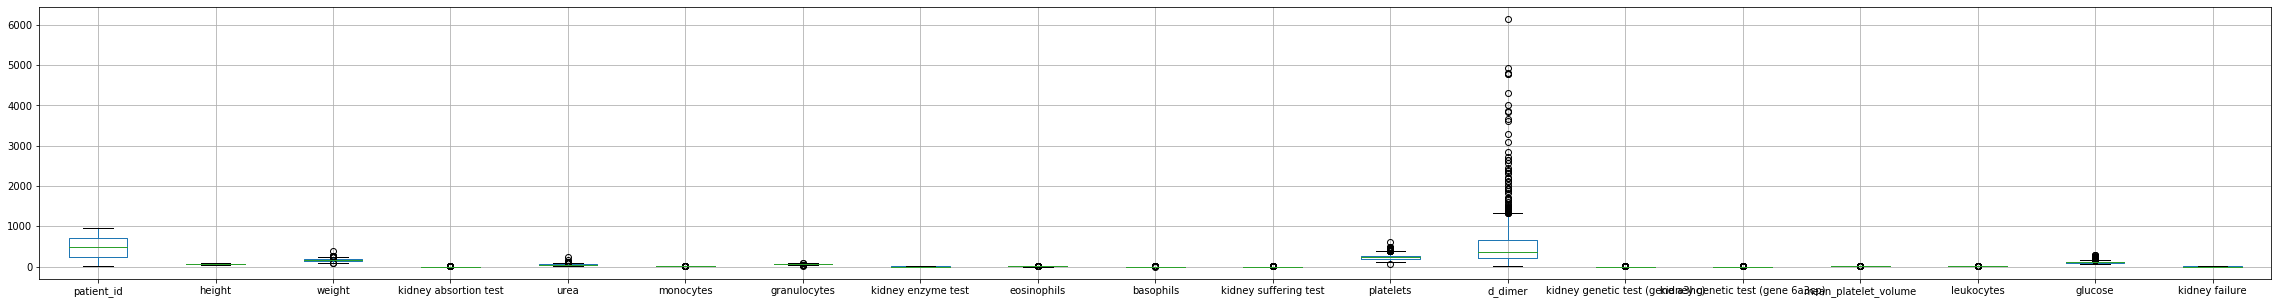

In [0]:
plt.figure(figsize=(40,5))
data.boxplot()
plt.show()

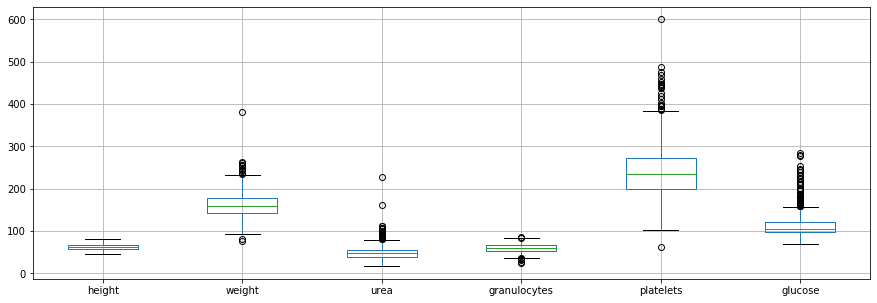

In [0]:
plt.figure(figsize=(15,5))
data[['height','weight','urea','granulocytes','platelets','glucose']].boxplot()

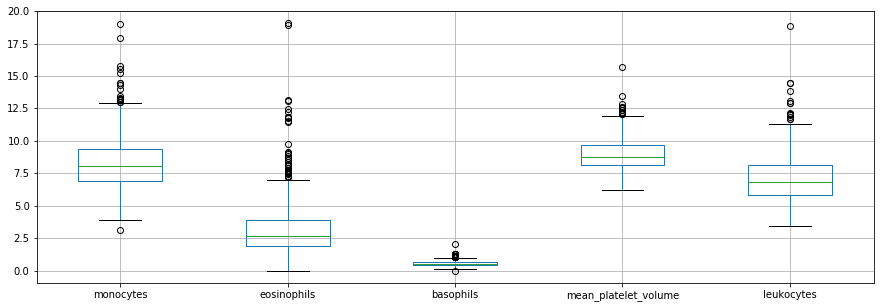

In [0]:
plt.figure(figsize=(15,5))
data[['monocytes','eosinophils','basophils','mean_platelet_volume','leukocytes',]].boxplot()

[]

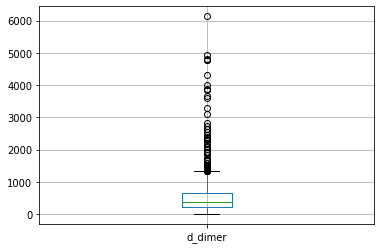

In [0]:
data[['d_dimer']].boxplot()
plt.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1ff0d5a90>]],
      dtype=object)

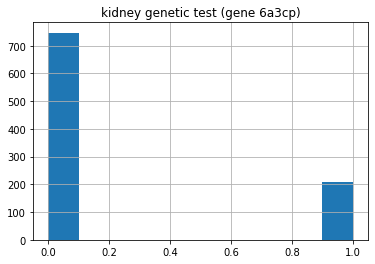

In [0]:
data[['kidney genetic test (gene 6a3cp)']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1ff0bbef0>]],
      dtype=object)

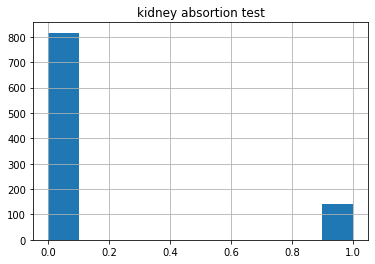

In [0]:
data[['kidney absortion test']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1ff006d30>]],
      dtype=object)

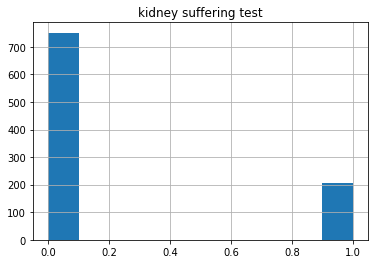

In [0]:
data[['kidney suffering test']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1ff0cb438>]],
      dtype=object)

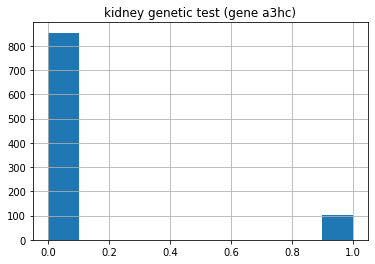

In [0]:
data[['kidney genetic test (gene a3hc)']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1ff8dc7f0>]],
      dtype=object)

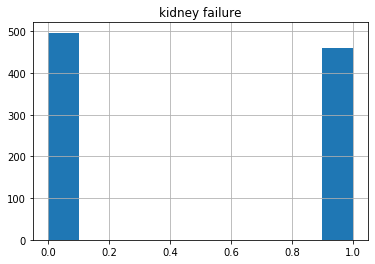

In [0]:
data[['kidney failure']].hist()

In [0]:
data2 = pd.DataFrame(data)
data2.dropna(how='any', inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 955
Data columns (total 19 columns):
patient_id                          669 non-null int64
height                              669 non-null float64
weight                              669 non-null float64
kidney absortion test               669 non-null int64
urea                                669 non-null float64
monocytes                           669 non-null float64
granulocytes                        669 non-null float64
kidney enzyme test                  669 non-null int64
eosinophils                         669 non-null float64
basophils                           669 non-null float64
kidney suffering test               669 non-null int64
platelets                           669 non-null float64
d_dimer                             669 non-null float64
kidney genetic test (gene a3hc)     669 non-null int64
kidney genetic test (gene 6a3cp)    669 non-null int64
mean_platelet_volume                669 non-null flo

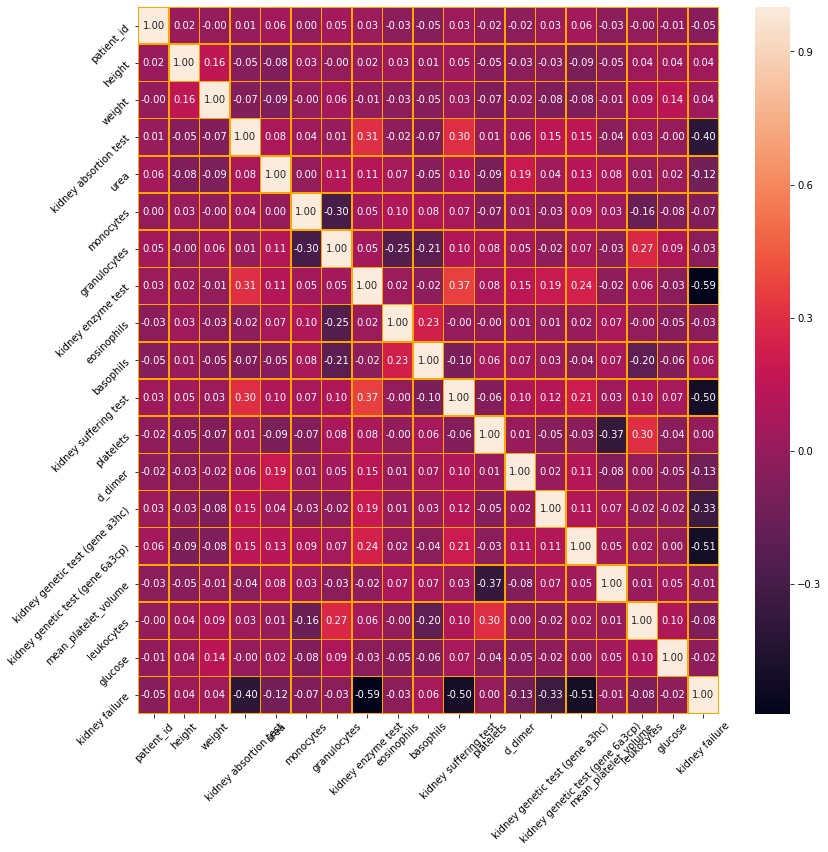

In [0]:
#HEAT MAP #correlation of parameters 
import seaborn as sns
f,ax=plt.subplots(figsize=(13,13))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Most relevant features 
from above correlation hotmap we can find  5 most relevant features to kidney failure
* kidney genetic test (gene a3hc)
* kidney genetic test (gene 6a3cp)
* kidney suffering test
* kidney absortion test
* kidney enzyme tes

according to the paper we can find,these features make sense.  

[kidney failure](fhttps://www.kidney.org/atoz/content/kidneydiscauses)  


# With 4 most relavant features

## Feature Selection
select above 5 features 
* kidney genetic test (gene a3hc)
* kidney genetic test (gene 6a3cp)
* kidney suffering test
* kidney absortion test
* kidney enzyme tes

In [0]:
data2 = pd.DataFrame(data=data,columns=['kidney genetic test (gene a3hc)',
                                        'kidney genetic test (gene 6a3cp)',
                                        'kidney suffering test',
                                        'kidney absortion test',
                                        'kidney enzyme test',
                                        'kidney failure',
                                        ])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 6 columns):
kidney genetic test (gene a3hc)     957 non-null int64
kidney genetic test (gene 6a3cp)    957 non-null int64
kidney suffering test               957 non-null int64
kidney absortion test               957 non-null int64
kidney enzyme test                  957 non-null int64
kidney failure                      957 non-null int64
dtypes: int64(6)
memory usage: 45.0 KB


In [0]:
data2.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [0]:
data2.tail()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure
952,0,0,1,0,0,0
953,0,1,0,0,0,0
954,0,0,0,0,0,1
955,0,0,0,0,0,1
956,0,0,0,0,0,1


## Data clearing

There is not necessary to clear data.Considering there is no data missing and null value.

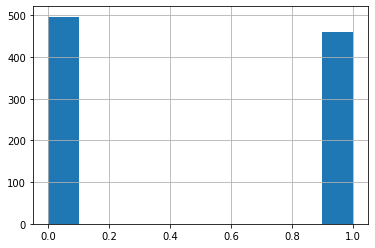

In [0]:
data2['kidney failure'].hist()

## Modeling

In [0]:
import numpy as np
from tensorflow import keras
data_set = data2.values
print(data_set.shape)
print(data_set[0:5])
data2.head(200)

(957, 6)
[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]]


,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
195,0,0,0,0,0,1
196,0,0,0,0,0,1
197,0,0,0,0,0,1
198,0,0,0,0,1,0


## split train and test dataset

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report 
np.random.shuffle(data_set)
x = data_set[:,np.arange(0,5)]
y = data_set[:,5]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Build decision tree

In [0]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=5)
print(model)     
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
print(model.feature_importances_)  

[0.12850583 0.2060804  0.15722037 0.17032282 0.33787059]


[Text(251.10000000000002, 199.32, 'X[4] <= 0.5\nentropy = 0.999\nsamples = 669\nvalue = [349, 320]'),
 Text(209.25, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.92\nsamples = 481\nvalue = [161, 320]'),
 Text(167.4, 126.83999999999999, 'X[2] <= 0.5\nentropy = 0.749\nsamples = 407\nvalue = [87, 320]'),
 Text(125.55000000000001, 90.6, 'X[0] <= 0.5\nentropy = 0.545\nsamples = 366\nvalue = [46, 320]'),
 Text(83.7, 54.359999999999985, 'X[3] <= 0.5\nentropy = 0.334\nsamples = 341\nvalue = [21, 320]'),
 Text(41.85, 18.119999999999976, 'entropy = 0.0\nsamples = 320\nvalue = [0, 320]'),
 Text(125.55000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(167.4, 54.359999999999985, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(209.25, 90.6, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(251.10000000000002, 126.83999999999999, 'entropy = 0.0\nsamples = 74\nvalue = [74, 0]'),
 Text(292.95, 163.07999999999998, 'entropy = 0.0\nsamples = 188\nvalue = [

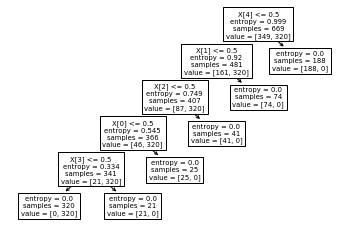

In [0]:
tree.plot_tree(model)

In [0]:
x_train.shape

(669, 5)

## Evaluate Model


### average accuracy

In [0]:
model.score(x_test,y_test)

1.0

### Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')


In [0]:
from sklearn.metrics import precision_recall_curve

precision_recall_curve(y_true=y_test,probas_pred=model.predict(x_test))


(array([1., 1.]), array([1., 0.]), array([1]))

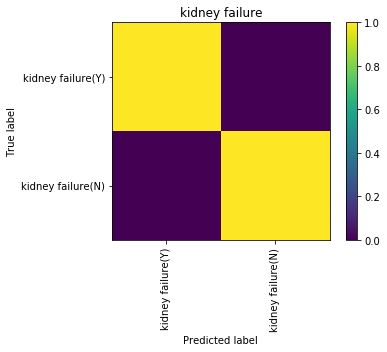

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,y_pred=model.predict(x_test))
plot_confusion_matrix(cm,['kidney failure(Y)','kidney failure(N)'],'kidney failure')


## Conclusion and Question :  
why the model performs so perfect?  
there is only a combine logic between input features and output?  
(Notice that the input features and label are binary)  

**out = -(c1||c2||c3||c4||c5)**

#### for kidney failure is 1  
all 5 input features are 0

In [0]:
test = data2[data2['kidney failure'] == 1]
test.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure
0,0,0,0,0,0,1
2,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
7,0,0,0,0,0,1


In [0]:
t2 =test[test['kidney genetic test (gene 6a3cp)']==1]
t2.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure


In [0]:
t2 =test[test['kidney absortion test']==1]
t2.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure


In [0]:
t2 =test[test['kidney genetic test (gene a3hc)']==1]
t2.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure


In [0]:
t2 =test[test['kidney enzyme test']==1]
t2.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure


In [0]:
t2 =test[test['kidney suffering test']==1]
t2.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure


### for kidney failure is 0  
there is at least one of 5 input feature's value is 1

In [0]:
test = data2[data2['kidney failure'] == 0]
test.head()

,kidney genetic test (gene a3hc),kidney genetic test (gene 6a3cp),kidney suffering test,kidney absortion test,kidney enzyme test,kidney failure
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
6,0,0,0,0,1,0
9,0,0,1,0,0,0


### so  
A patient **will suffer kidney** failure when when all results of these 5 tests is **negative**  
But at** least one result **of these 5 tests is **positive**, the patient **will not suffe**r kidney failure

# Delete 4 most relavant features


## Feature selection (first try)
Remove features:
* patient id
* weight
* height
* d_demiter
* mean_platelet_volume(same thing with platelet)

so We keep 9 features like:
* urea 
* monocytes
* granulocytes
* eosinophils                        
* basophils  
* platelets
* leukocytes
* glucose
* kidney genetic test (gene a3hc)

In [0]:
data2 = pd.DataFrame(data=data,columns=[
                                         'urea',
                                        'monocytes',
                                        'granulocytes',
                                        'eosinophils',
                                        'basophils',
                                        'platelets',
                                        'leukocytes',
                                        'glucose',
                                        'kidney genetic test (gene a3hc)',
                                         'kidney failure',
                                        ])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
urea                               836 non-null float64
monocytes                          832 non-null float64
granulocytes                       832 non-null float64
eosinophils                        832 non-null float64
basophils                          832 non-null float64
platelets                          833 non-null float64
leukocytes                         833 non-null float64
glucose                            836 non-null float64
kidney genetic test (gene a3hc)    957 non-null int64
kidney failure                     957 non-null int64
dtypes: float64(8), int64(2)
memory usage: 74.9 KB


Deal with data missing(delete rows with missing value )

In [0]:
data3 = pd.DataFrame(data2)
data3.dropna(how='any', inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 956
Data columns (total 10 columns):
urea                               832 non-null float64
monocytes                          832 non-null float64
granulocytes                       832 non-null float64
eosinophils                        832 non-null float64
basophils                          832 non-null float64
platelets                          832 non-null float64
leukocytes                         832 non-null float64
glucose                            832 non-null float64
kidney genetic test (gene a3hc)    832 non-null int64
kidney failure                     832 non-null int64
dtypes: float64(8), int64(2)
memory usage: 71.5 KB


I think it is acceptable.We still have 832 rows 

In [0]:
import numpy as np
data_set0 = data3.values
print(data_set0.shape)
print(data_set0[0:5])
data3.head(5)

(832, 10)
[[3.6300e+01 7.0350e+00 4.3365e+01 6.2830e+00 7.2800e-01 2.6104e+02
  6.7600e+00 1.0706e+02 0.0000e+00 0.0000e+00]
 [5.0600e+01 6.9300e+00 6.8565e+01 4.8410e+00 6.2400e-01 3.3176e+02
  8.6320e+00 1.8868e+02 0.0000e+00 1.0000e+00]
 [2.7500e+01 1.1235e+01 5.7015e+01 4.7380e+00 8.3200e-01 6.0008e+02
  7.6960e+00 1.1978e+02 0.0000e+00 0.0000e+00]
 [5.0600e+01 8.4000e+00 4.8195e+01 4.6350e+00 5.2000e-01 2.0072e+02
  6.6560e+00 1.2402e+02 0.0000e+00 0.0000e+00]
 [3.1900e+01 7.3500e+00 5.5965e+01 4.2230e+00 9.3600e-01 2.6104e+02
  5.9280e+00 8.5860e+01 0.0000e+00 1.0000e+00]]


,urea,monocytes,granulocytes,eosinophils,basophils,platelets,leukocytes,glucose,kidney genetic test (gene a3hc),kidney failure
0,36.3,7.035,43.365,6.283,0.728,261.04,6.760,107.06,0,0
1,50.6,6.930,68.565,4.841,0.624,331.76,8.632,188.68,0,1
3,27.5,11.235,57.015,4.738,0.832,600.08,7.696,119.78,0,0
4,50.6,8.400,48.195,4.635,0.520,200.72,6.656,124.02,0,0
5,31.9,7.350,55.965,4.223,0.936,261.04,5.928,85.86,0,1


## Modeling

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report 
np.random.shuffle(data_set0)
x = data_set0[:,np.arange(0,9)]
y = data_set0[:,9]
x_train0, x_test0, y_train0, y_test0 = train_test_split(x, y, test_size = 0.2)
x.shape

(832, 9)

In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',random_state=5)
print(model)     
model.fit(x_train0, y_train0)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

model overfit

In [0]:
print(classification_report(y_train0,model.predict(x_train0))) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       352
         1.0       1.00      1.00      1.00       313

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665



In [0]:
print(classification_report(y_test0,model.predict(x_test0)))

              precision    recall  f1-score   support

         0.0       0.57      0.68      0.62        81
         1.0       0.63      0.51      0.56        86

    accuracy                           0.59       167
   macro avg       0.60      0.60      0.59       167
weighted avg       0.60      0.59      0.59       167



[Text(277.7495702357564, 213.25846153846155, 'X[8] <= 0.5\nentropy = 0.998\nsamples = 665\nvalue = [352, 313]'),
 Text(275.118528978389, 204.89538461538461, 'X[1] <= 13.702\nentropy = 0.998\nsamples = 592\nvalue = [279, 313]'),
 Text(272.48748772102164, 196.53230769230768, 'X[6] <= 9.1\nentropy = 0.996\nsamples = 585\nvalue = [272, 313]'),
 Text(235.82762770137526, 188.16923076923078, 'X[0] <= 67.65\nentropy = 0.99\nsamples = 507\nvalue = [223, 284]'),
 Text(181.5829567779961, 179.80615384615385, 'X[1] <= 9.188\nentropy = 0.981\nsamples = 466\nvalue = [195, 271]'),
 Text(142.81620825147348, 171.44307692307692, 'X[3] <= 6.438\nentropy = 0.959\nsamples = 336\nvalue = [128, 208]'),
 Text(110.83261296660119, 163.07999999999998, 'X[0] <= 64.35\nentropy = 0.949\nsamples = 324\nvalue = [119, 205]'),
 Text(108.20157170923379, 154.71692307692308, 'X[4] <= 0.572\nentropy = 0.954\nsamples = 318\nvalue = [119, 199]'),
 Text(52.12750491159136, 146.35384615384615, 'X[2] <= 62.212\nentropy = 0.984\ns

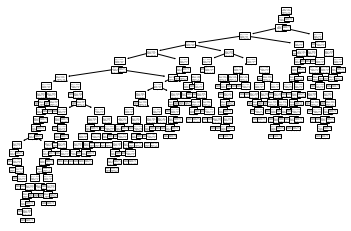

In [0]:
tree.plot_tree(model)

In [0]:
# prune: limit max_depth
model01 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20 ,min_samples_leaf=5,random_state=5)
print(model01)     
model01.fit(x_train0, y_train0)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

performance improved on test dataset 

In [0]:
print(classification_report(y_train0,model01.predict(x_train0))) 

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       352
         1.0       0.85      0.85      0.85       313

    accuracy                           0.86       665
   macro avg       0.86      0.86      0.86       665
weighted avg       0.86      0.86      0.86       665



In [0]:
print(classification_report(y_test0,model01.predict(x_test0)))

              precision    recall  f1-score   support

         0.0       0.59      0.69      0.64        81
         1.0       0.65      0.55      0.59        86

    accuracy                           0.62       167
   macro avg       0.62      0.62      0.62       167
weighted avg       0.62      0.62      0.62       167



In [0]:
#random forest (deal with overfit)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model02 = RandomForestClassifier(n_estimators=500,max_features=None, min_samples_leaf= 10,max_depth=80,min_samples_split=300,random_state=10)
scores = cross_val_score(model02, x_train0, y_train0, cv=5)


In [0]:
model02.fit(x_train0,y_train0)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Evaluate

In [0]:
model02.score(x_train0,y_train0)

0.6631578947368421

In [0]:
model02.score(x_test0,y_test0)

0.6526946107784432

In [0]:
print(classification_report(y_train0,model02.predict(x_train0)))

              precision    recall  f1-score   support

         0.0       0.78      0.51      0.61       352
         1.0       0.60      0.84      0.70       313

    accuracy                           0.66       665
   macro avg       0.69      0.67      0.66       665
weighted avg       0.70      0.66      0.65       665



In [0]:
print(classification_report(y_test0,model02.predict(x_test0)))

              precision    recall  f1-score   support

         0.0       0.73      0.46      0.56        81
         1.0       0.62      0.84      0.71        86

    accuracy                           0.65       167
   macro avg       0.67      0.65      0.64       167
weighted avg       0.67      0.65      0.64       167



In [0]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train0,y_train0)
svm_model.score(x_train0,y_train0)

0.5293233082706766

In [0]:
svm_model.score(x_test0,y_test0)

0.48502994011976047

In [0]:
!pip install hyperopt

In [0]:
from sklearn import linear_model
from sklearn import preprocessing
x_train0_n = preprocessing.normalize(x_train0)
reg = linear_model.SGDClassifier(max_iter=500000,loss = 'log',)
reg.fit(x_train0,y_train0)
reg.score(x_train0,y_train0)

0.47368421052631576

In [0]:
reg.score(x_test0,y_test0)

0.5269461077844312

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,y_pred=model4.predict(x_test))
plot_confusion_matrix(cm,['kidney failure(Y)','kidney failure(N)'],'kidney failure')


NameError: ignored

In [0]:
cm

array([[52, 31],
       [34, 50]])

## Feature selection (second try)

In [0]:
data4 = pd.DataFrame(data=data,columns=[
                                         'urea',
                                        'platelets',
                                        'glucose',
                                        'leukocytes',
                                        'kidney genetic test (gene a3hc)',
                                         'kidney failure',
                                        ])
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 6 columns):
urea                               836 non-null float64
platelets                          833 non-null float64
glucose                            836 non-null float64
leukocytes                         833 non-null float64
kidney genetic test (gene a3hc)    957 non-null int64
kidney failure                     957 non-null int64
dtypes: float64(4), int64(2)
memory usage: 45.0 KB


In [0]:
data5 = pd.DataFrame(data4)
data5.dropna(how='any', inplace=True)
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 956
Data columns (total 6 columns):
urea                               833 non-null float64
platelets                          833 non-null float64
glucose                            833 non-null float64
leukocytes                         833 non-null float64
kidney genetic test (gene a3hc)    833 non-null int64
kidney failure                     833 non-null int64
dtypes: float64(4), int64(2)
memory usage: 45.6 KB


In [0]:
import numpy as np
data_set = data5.values
print(data_set.shape)
print(data_set[0:5])
data5.head(5)

(833, 6)
[[ 36.3   261.04  107.06    6.76    0.      0.   ]
 [ 50.6   331.76  188.68    8.632   0.      1.   ]
 [ 27.5   600.08  119.78    7.696   0.      0.   ]
 [ 50.6   200.72  124.02    6.656   0.      0.   ]
 [ 31.9   261.04   85.86    5.928   0.      1.   ]]


,urea,platelets,glucose,leukocytes,kidney genetic test (gene a3hc),kidney failure
0,36.3,261.04,107.06,6.760,0,0
1,50.6,331.76,188.68,8.632,0,1
3,27.5,600.08,119.78,7.696,0,0
4,50.6,200.72,124.02,6.656,0,0
5,31.9,261.04,85.86,5.928,0,1


## Modeling 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report 
np.random.shuffle(data_set)
x = data_set[:,np.arange(0,5)]
y = data_set[:,5]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x.shape

(833, 5)

In [0]:
# prune: max_depth = 7 , min_samples_leaf = 5
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=3)
print(model)     
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
model.score(x_train,y_train)

0.7882882882882883

In [0]:
model.score(x_test,y_test)

0.5269461077844312

In [0]:
print(model.feature_importances_)  

[0.13636993 0.27078938 0.10964685 0.23181563 0.25137821]


## Evaluate

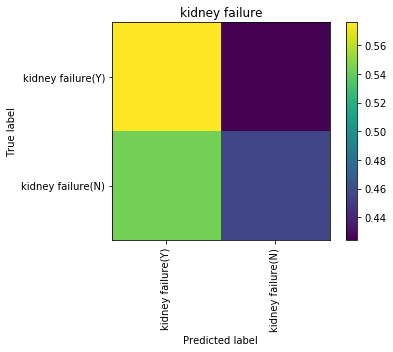

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,y_pred=model.predict(x_test))
plot_confusion_matrix(cm,['kidney failure(Y)','kidney failure(N)'],'kidney failure')


In [0]:
print(cm)

[[62 29]
 [33 43]]


In [0]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       342
         1.0       1.00      1.00      1.00       323

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665



In [0]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.61      0.58      0.59        99
         1.0       0.42      0.46      0.44        68

    accuracy                           0.53       167
   macro avg       0.52      0.52      0.52       167
weighted avg       0.53      0.53      0.53       167



In [0]:
#random forest (deal with overfit)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100, max_depth= 6, random_state=10)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [0]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.77       335
         1.0       0.73      0.92      0.81       331

    accuracy                           0.79       666
   macro avg       0.81      0.79      0.79       666
weighted avg       0.81      0.79      0.79       666



In [0]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.51      0.61        99
         1.0       0.51      0.76      0.62        68

    accuracy                           0.61       167
   macro avg       0.64      0.63      0.61       167
weighted avg       0.66      0.61      0.61       167

